Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)       

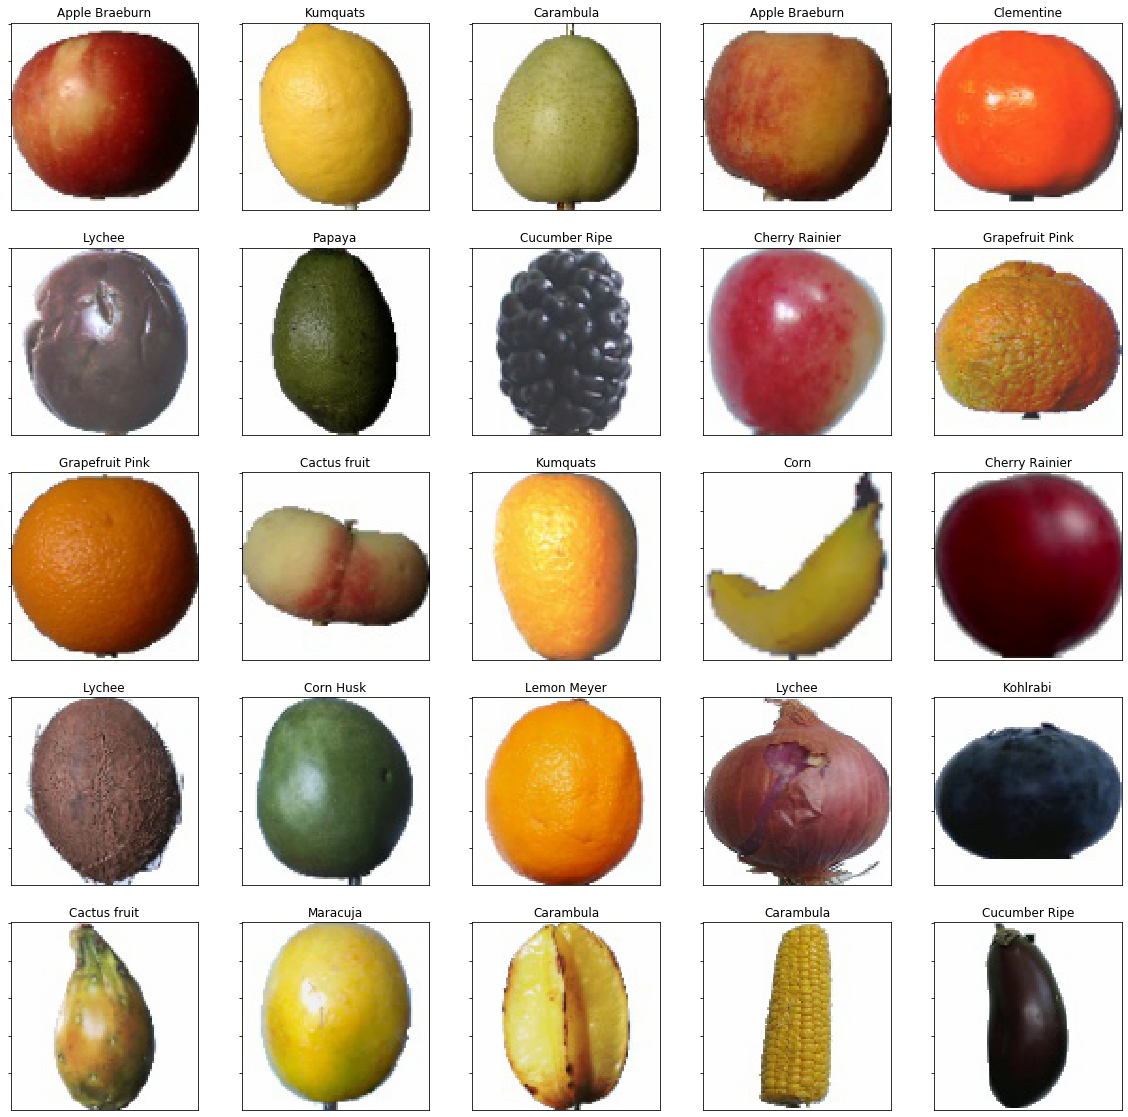

In [4]:
from keras.models import load_model
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt

model = load_model('baocao_fruits.hdf5')

model.summary()

class Fruit:
    def __init__(self, img_dir = ''):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = load_model('baocao_fruits.hdf5')
        self.Label_dict = labels =  {'Apple Braeburn': 0,
             'Apple Crimson Snow': 1,
             'Apricot': 2,
             'Avocado': 3,
             'Banana': 4,
             'Banana Red': 5,
             'Beetroot': 6,
             'Blueberry': 7,
             'Cactus fruit': 8,
             'Carambula': 9,
             'Cauliflower': 10,
             'Cherry Rainier': 11,
             'Cherry Wax Black': 12,
             'Cherry Wax Red': 13,
             'Cherry Wax Yellow': 14,
             'Chestnut': 15,
             'Clementine': 16,
             'Cocos': 17,
             'Corn': 18,
             'Corn Husk': 19,
             'Cucumber Ripe': 20,
             'Dates': 21,
             'Eggplant': 22,
             'Fig': 23,
             'Ginger Root': 24,
             'Granadilla': 25,
             'Grape Blue': 26,
             'Grape Pink': 27,
             'Grapefruit Pink': 28,
             'Grapefruit White': 29,
             'Guava': 30,
             'Hazelnut': 31,
             'Huckleberry': 32,
             'Kaki': 33,
             'Kiwi': 34,
             'Kohlrabi': 35,
             'Kumquats': 36,
             'Lemon': 37,
             'Lemon Meyer': 38,
             'Limes': 39,
             'Lychee': 40,
             'Mandarine': 41,
             'Mango': 42,
             'Mango Red': 43,
             'Mangostan': 44,
             'Maracuja': 45,
             'Melon Piel de Sapo': 46,
             'Mulberry': 47,
             'Nectarine': 48,
             'Nectarine Flat': 49,
             'Nut Forest': 50,
             'Nut Pecan': 51,
             'Onion Red': 52,
             'Onion White': 53,
             'Orange': 54,
             'Papaya': 55,
             'Passion Fruit': 56,
             'Peach': 57,
             'Peach Flat': 58,
             'Pear': 59}
        self.label = list(self.Label_dict.keys())
    
    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 100, 100, 3))
        for i,img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir,img), target_size=(100, 100))
            self.batch_holder[i, :] = img
        return self.batch_holder
    
    def predict(self):
        fig = plt.figure(figsize=(20, 20))
        for i,img in enumerate(self.batch_holder):
            fig.add_subplot(5, 5, i+1)
            result=self.model.predict(self.batch_holder)
            result_classes = result.argmax(axis=-1)
            plt.title(self.label[result_classes[i]])
            plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
            plt.imshow(img/256.)
        plt.show()
        
obj = Fruit('test_images/')

obj.read_images()
obj.predict()